In [81]:
#Importar librerias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [82]:
#Importartar data set
vuelo=pd.read_csv('vistara.csv')

In [83]:
vueloN=vuelo.drop(['Unnamed: 11'], axis=1)


In [84]:
vueloN['dolares'] = vueloN['price'] * 0.12

In [85]:
vueloN.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,dolares
0,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,16,1714,205.68
1,Vistara,UK-893,Bangalore,Evening,zero,Night,Hyderabad,Economy,1.00,17,1714,205.68
2,Vistara,UK-897,Bangalore,Early_Morning,zero,Morning,Hyderabad,Economy,1.17,17,1714,205.68


In [86]:
#Información
vueloN.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127859 entries, 0 to 127858
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           127859 non-null  object 
 1   flight            127859 non-null  object 
 2   source_city       127859 non-null  object 
 3   departure_time    127859 non-null  object 
 4   stops             127859 non-null  object 
 5   arrival_time      127859 non-null  object 
 6   destination_city  127859 non-null  object 
 7   class             127859 non-null  object 
 8   duration          127859 non-null  float64
 9   days_left         127859 non-null  int64  
 10  price             127859 non-null  int64  
 11  dolares           127859 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 11.7+ MB


In [87]:
# columnas y filas
vueloN.shape


(127859, 12)

In [88]:
#Variables dataset
vueloN.describe()


,duration,days_left,price,dolares
count,127859.000000,127859.000000,127859.000000,127859.000000
mean,13.326634,25.894532,30396.536302,3647.584356
std,6.777230,13.638537,25637.159445,3076.459133
min,1.000000,1.000000,1714.000000,205.680000
25%,8.500000,14.000000,6412.000000,769.440000
50%,12.500000,26.000000,15543.000000,1865.160000
75%,17.000000,38.000000,55377.000000,6645.240000
max,47.080000,49.000000,123071.000000,14768.520000


In [89]:
#Buscar null
vueloN.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dolares             0
dtype: int64

In [90]:
#Valor unico de cada variable
vueloN.nunique()


airline                1
flight               133
source_city            6
departure_time         5
stops                  3
arrival_time           6
destination_city       6
class                  2
duration             392
days_left             49
price               5303
dolares             5303
dtype: int64

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#precio vs dias

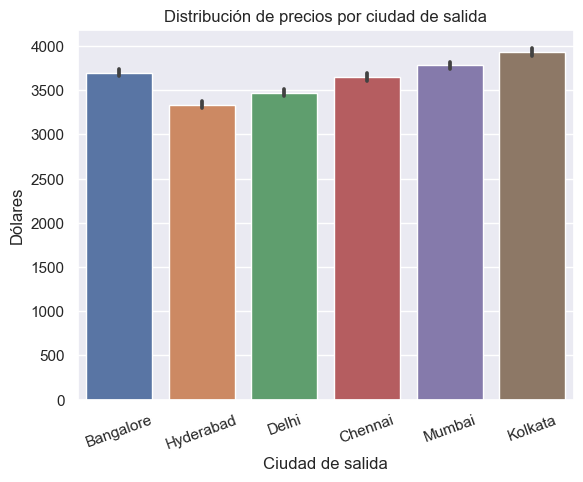

In [95]:
#Graficas 
sns.barplot(data=vueloN, x='source_city', y='dolares')
plt.xlabel('Ciudad de salida')
plt.ylabel('Dólares')
plt.title('Distribución de precios por ciudad de salida')
plt.xticks(rotation=20)
plt.show()

